In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

# Problem 12

In [2]:
EI = {'a':3., 'b':5., 'c':7., 'd':13., 'e':17.}
sec = {}

In [3]:
#Remove
mdl = em.rModel(2,3)
n = mdl.dnodes
e = mdl.delems

for elem in EI:
    sec[elem] = mdl.xsection('default', 1, EI[elem])
t1 = mdl.xsection('t1', 10, 1)
t2 = mdl.xsection('t2', 20, 1) 

mdl.node('1',  0.0, 0.0)
mdl.node('2',  6.0, 0.0)
mdl.node('3', 12.0, 0.0)
mdl.node('4',  6.0, 8.0)
mdl.node('5', 12.0, 8.0)

mdl.beam('a', n['1'], n['2'], sec=sec['a'])
mdl.beam('b', n['2'], n['3'], sec=sec['b'])
mdl.beam('c', n['2'], n['4'], sec=sec['c'])
mdl.beam('d', n['3'], n['5'], sec=sec['d'])
mdl.beam('e', n['4'], n['5'], sec=sec['e'])
mdl.truss('f', n['1'], n['4'], xsec=t1)
mdl.truss('g', n['3'], n['4'], xsec=t2)

mdl.hinge(e['a'], n['1'])
mdl.hinge(e['c'], n['2'])
mdl.hinge(e['d'], n['5'])
mdl.hinge(e['e'], n['5'])

mdl.fix(n['1'], ['x','y', 'rz'])
mdl.fix(n['3'], ['y'])
mdl.fix(n['5'], ['rz'])

mdl.DOF = [[6, 7, 8],[6, 1, 2],[6, 9, 3],[4, 1, 5], [4, 9, 10]]

In [4]:
em.analysis.characterize(mdl)
mdl.nq

[2, 3, 2, 2, 2, 1, 1]

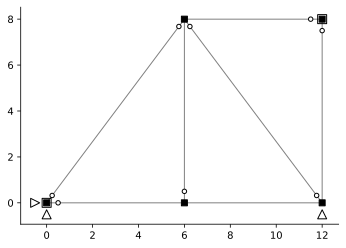

In [5]:
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)

## Part 1: Find $K_f$

In [6]:
K = em.K_matrix(mdl)
K.f

,$1$,$2$,$3$,$4$,$5$
$P_{1}$,2.475556,0.583333,0.833333,-0.480000,1.416667
$P_{2}$,0.583333,4.833333,1.666667,0.000000,0.000000
$P_{3}$,0.833333,1.666667,8.208333,0.609375,0.000000
$P_{4}$,-0.480000,0.000000,0.609375,1.197188,0.328125
$P_{5}$,1.416667,0.000000,0.000000,0.328125,11.125000


## Part 2: Find $P_0$

In [7]:
w = 11
e['e'].w['y'] = -w
e['d'].w['y'] =  w

B = em.B_matrix(mdl)
Pwf = em.P_vector(B).wf
Pwf

,$P_{{ffff}}$
$1$,33.0
$2$,0.0
$3$,0.0
$4$,44.0
$5$,0.0


In [8]:
Q0 = em.Q_vector(B).o
Q0

,$Q_{{}}$
$a_1$,-0.0
$a_2$,0.0
$a_3$,0.0
$b_1$,-0.0
$b_2$,0.0
$b_3$,0.0
$c_1$,-0.0
$c_2$,0.0
$c_3$,0.0
$d_1$,-0.0


In [9]:
P0 = B.f@Q0 + Pwf
P0

,$P_{{ffff}}$
$1$,41.25
$2$,0.00
$3$,-88.00
$4$,33.00
$5$,49.50
